<a href="https://colab.research.google.com/github/DheerajKP1/15-puzzle/blob/master/yolov8_seg%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
import imutils
import math
from glob import glob
from skimage import io
from shutil import copy
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import save_model

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1noAejnCZB0LPk6DA1o5")
project = rf.workspace("iit-kgp-hddfw").project("tyre-ylryk")
dataset = project.version(5).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 676.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to tyre-5 in yolov8:: 100%|██████████| 592/592 [00:00<00:00, 5431.88it/s]


In [ ]:
'''from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='/content/tyre-5/data.yaml', epochs=100, imgsz=640)'''

"from ultralytics import YOLO\n\n# Load a model\nmodel = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)\n\n# Train the model\nresults = model.train(data='/content/tyre-5/data.yaml', epochs=100, imgsz=640)"

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 4.2 MB/s eta 0:00:00


In [ ]:
path='/content/16.jpg'
input_img=plt.imread(path)
model=YOLO('/content/drive/MyDrive/yolov8-seg/segment/train2/weights/best.pt')
result=model(path,save=True,save_txt=True,conf=0.5)[0]
if result.masks==None:
  result=model(path,save=True,save_txt=True)[0]

o_path=f"{result.save_dir}/{path.split('/')[-1]}"
masked_img=plt.imread(o_path)


image 1/1 /content/16.jpg: 480x640 (no detections), 289.3ms
Speed: 5.1ms preprocess, 289.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict46
0 label saved to runs/segment/predict46/labels

image 1/1 /content/16.jpg: 480x640 1 roi, 249.1ms
Speed: 3.8ms preprocess, 249.1ms inference, 6.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict46
1 label saved to runs/segment/predict46/labels


Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


Text(0.5, 1.0, 'Masked_img')

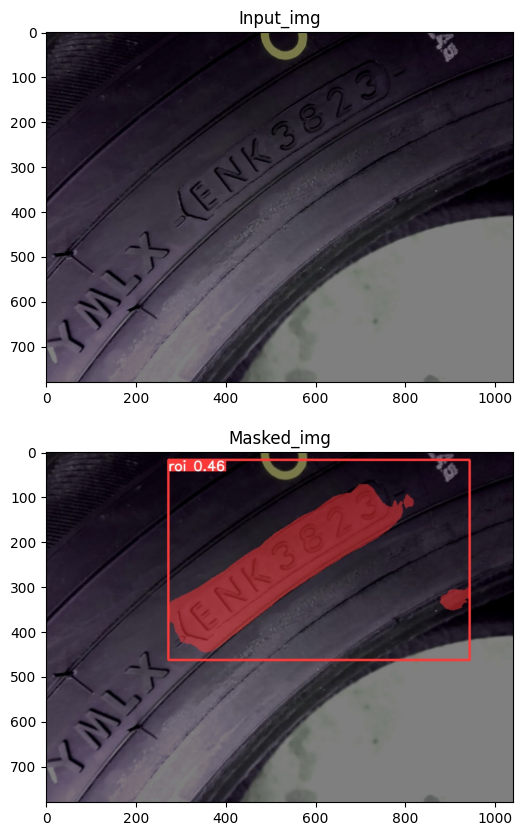

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(masked_img)
plt.subplot(2,1,1)
plt.imshow(input_img)
plt.title('Input_img')
plt.subplot(2,1,2)
plt.imshow(masked_img)
plt.title('Masked_img')

In [ ]:
H,W,_=masked_img.shape
print(H,W)

780 1040


In [ ]:
for j,mask in enumerate(result.masks.data):
  #mask=mask.cuda()
  mask=mask.cpu().numpy()*255
  mask=cv.resize(mask,(W,H))
  cv.imwrite('./output3.jpg',mask)

In [ ]:
mask=plt.imread('/content/output3.jpg')
ret,thresh = cv.threshold(mask,100,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
max_cnt_index = max(range(len(contours)), key=lambda i: cv.contourArea(contours[i]))
cnt=contours[max_cnt_index]

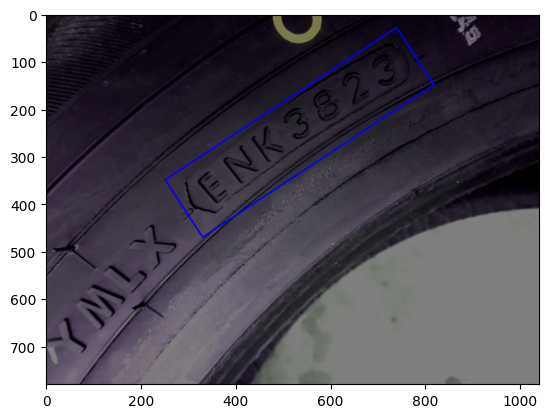

In [ ]:
img=plt.imread(path)
plt.imshow(img)
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
plt.imshow(cv.drawContours(img,[box],0,(0,0,255),2))

In [ ]:
box

array([[251, 349],
       [739,  28],
       [818, 148],
       [330, 470]])

In [ ]:
w=int(math.dist(box[0],box[1]))
h=int(math.dist(box[1],box[2]))
w,h

(584, 143)

In [ ]:

def row_sum(box):
    return np.sum(box)
min_sum_index = min(range(len(box)), key=lambda i: row_sum(box[i]))

if (w<h):
  box = np.roll(box,-1,axis=0)
  min_sum_index-= 1
  print(box)


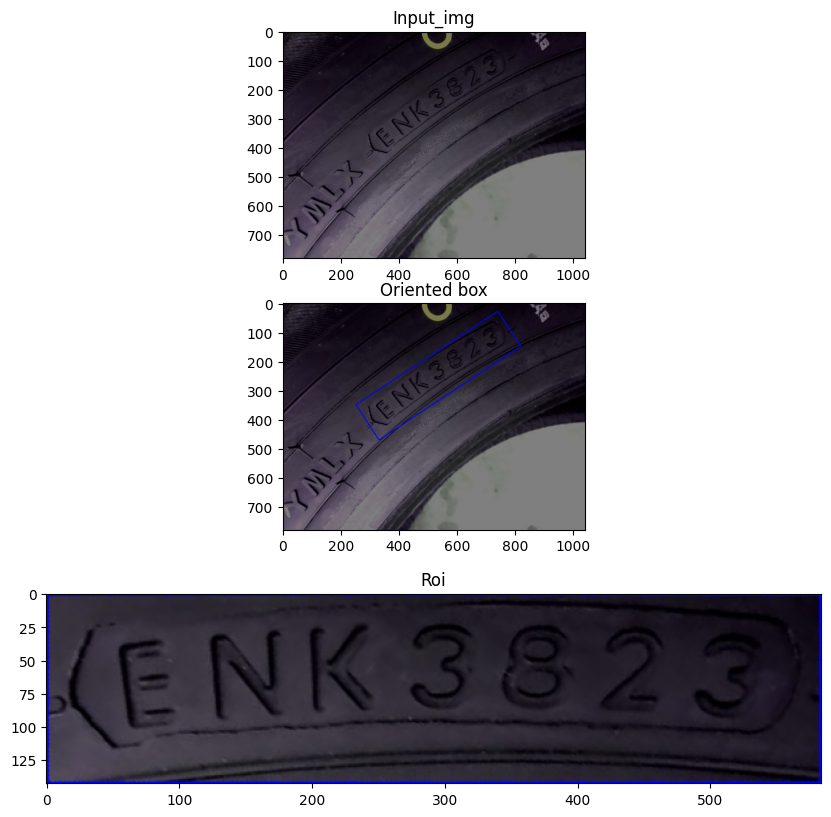

In [ ]:
w=int(math.dist(box[0],box[1]))
h=int(math.dist(box[1],box[2]))
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.title('Input_img')
plt.imshow(input_img)
plt.subplot(3,1,2)
plt.title('Oriented box')
plt.imshow(img)
point1=np.float32(box)
point2=np.float32([[0,0],[w,0],[w,h],[0,h]])
M=cv.getPerspectiveTransform(point1,point2)
roi=cv.warpPerspective(img,M,(w,h))
plt.subplot(3, 1, 3)
plt.title("Roi")
plt.imshow(roi)